# Ecuación de calor en 1D

Discretizamos $u(x,t)$ como $u_i^n$, aproximación a $u(x_i, t_n)$

Para una $t_n$ dada, las $u_i^n$ forman un vector.

Sistema de tamaño $1$ con $M$ nodos en el espacio:

In [51]:
M = 100  # numero de nodos
L = 100.  # tamaño del sistema físico

δx = L / (M-1)

u0 = zeros(M)   # condiciones iniciales
u0[floor(M/2)] = 1.

1.0

In [52]:
floor(3.1)  # ⌊⋅⌋  en matemáticas

3.0

In [53]:
ceil(3.1)  # ⌈⋅⌉

4.0

In [54]:
u = u0

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [55]:
using PyPlot

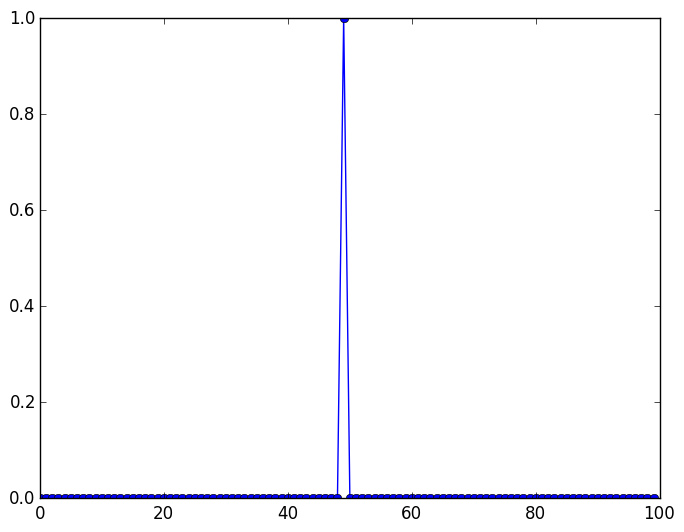

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11185aba8>

In [56]:
plot(u0, "o-")

## 1 paso: 

In [57]:
u = u0   # qué hace esto?  MISMO LUGAR EN LA MEMORIA!

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [58]:
u[3] = 17

17

In [59]:
u0  # tambien cambió :/

100-element Array{Float64,1}:
  0.0
  0.0
 17.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮  
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [60]:
u0[3] = 0.0

0.0

In [61]:
u0

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [62]:
u = copy(u0)   # copia!

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

`u` contiene el estado actual del sistema

Después de un paso: el estado nuevo del sistema, un *nuevo* vector

In [63]:
u_nueva = zeros(M)

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [64]:
δt = 2.^(-6.)

0.015625

Para cada `i` (**excepto las fronteras**):

    u_nueva[i] = u[i] + (δt/(δx^2)) * (u[i-1] - 2u[i] + u[i+1])

In [65]:
for i in 2:M-1
    u_nueva[i] = u[i] + δt * (u[i-1] - 2u[i] + u[i+1]) / (δx^2)
end

In [66]:
u_nueva

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

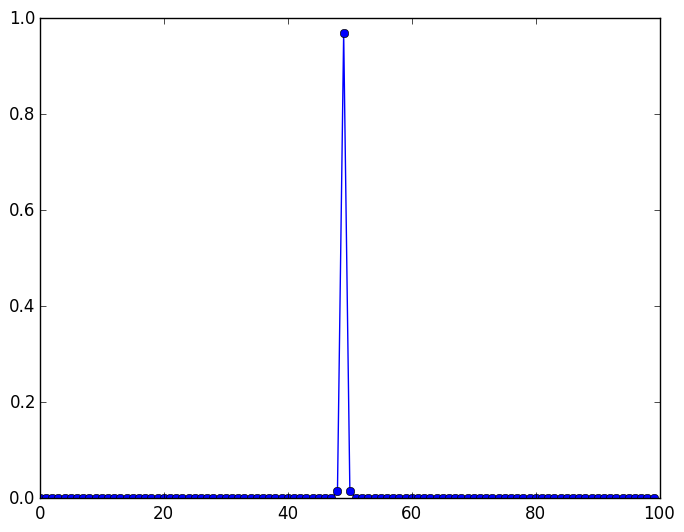

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x111a1b828>

In [67]:
plot(u_nueva, "o-")

In [ ]:
# u = u_nueva  # ?????????? NOOOOOO

In [68]:
#  u = copy(u_nueva)   # funciona, pero NOOOO

In [ ]:
# Podria hacer:

for i in 1:M
    u[i] = u_nueva[i]
end

In [ ]:
# solucion truculenta:

u, u_nueva = u_nueva, u    # SWAP / INTERCAMBIO

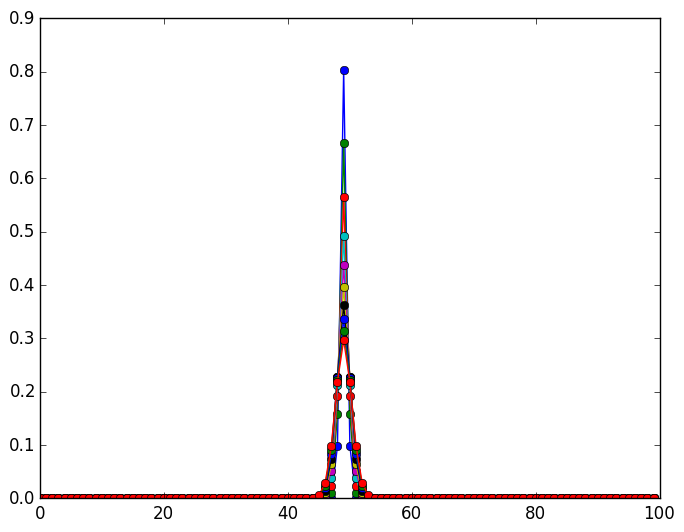

In [72]:
# Bucle:

δt = 0.1

num_pasos = 10

u = copy(u0)

γ = δt / (δx^2)

for paso in 1:num_pasos  # tiempo
    
    for i in 2:M-1  # espacio
        u_nueva[i] = u[i] + γ * (u[i-1] - 2u[i] + u[i+1]) 
    end
    

    plot(u_nueva, "o-")
    
    u, u_nueva = u_nueva, u
end
    
    